In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [116]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/Meta_Stock_Analysis_Data.csv")

In [117]:

data.name = "data"
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,...,"('Close', 'SNAP')","('Close', 'TCEHY')","('High', 'SNAP')","('High', 'TCEHY')","('Low', 'SNAP')","('Low', 'TCEHY')","('Open', 'SNAP')","('Open', 'TCEHY')","('Volume', 'SNAP')","('Volume', 'TCEHY')"
0,0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN,...,NaN,5.682,NaN,5.780,NaN,5.672,NaN,5.730,NaN,355000
1,1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.109861,NaN,...,NaN,5.570,NaN,5.570,NaN,5.516,NaN,5.564,NaN,590000
2,2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.089039,NaN,...,NaN,5.400,NaN,5.474,NaN,5.358,NaN,5.474,NaN,1549500
3,3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.032258,NaN,...,NaN,5.410,NaN,5.452,NaN,5.320,NaN,5.452,NaN,131000
4,4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.032187,NaN,...,NaN,5.480,NaN,5.554,NaN,5.460,NaN,5.538,NaN,156000


In [118]:

#Data types of the columns present in the DataSet
data.dtypes

Unnamed: 0                   int64
Date                        object
Open                       float64
High                       float64
Low                        float64
Close                      float64
Adj Close                  float64
Volume                       int64
Returns                    float64
MovingAverage_50           float64
MovingAverage_200          float64
VolumeChange               float64
VolumeMovingAverage_50     float64
VolumeMovingAverage_200    float64
MarketReturns              float64
CAPM                       float64
HighLowRange               float64
HighCloseRange             float64
LowCloseRange              float64
Volatility                 float64
RSI                        float64
Momentum                   float64
VolumeMovingAverage_10     float64
PriceLag_1                 float64
ReturnLag_1                float64
PriceLag_3                 float64
ReturnLag_3                float64
PriceLag_5                 float64
ReturnLag_5         

In [119]:
# To check duplicated values
print(data.duplicated().value_counts())

False    2754
dtype: int64


No Duplicates found.

In [120]:
data.count()

Unnamed: 0                 2754
Date                       2754
Open                       2754
High                       2754
Low                        2754
Close                      2754
Adj Close                  2754
Volume                     2754
Returns                    2753
MovingAverage_50           2705
MovingAverage_200          2555
VolumeChange               2753
VolumeMovingAverage_50     2705
VolumeMovingAverage_200    2555
MarketReturns              2754
CAPM                       2753
HighLowRange               2754
HighCloseRange             2753
LowCloseRange              2753
Volatility                 2754
RSI                        2741
Momentum                   2744
VolumeMovingAverage_10     2745
PriceLag_1                 2753
ReturnLag_1                2752
PriceLag_3                 2751
ReturnLag_3                2750
PriceLag_5                 2749
ReturnLag_5                2748
Mkt-RF                     2754
SMB                        2754
HML     

In [121]:

# We need to check null values in dataset
data.isnull().sum()
#isnull(): This function takes a scalar or array-like object and indicates whether values are missing.
#And we can see that there are no Null values in our dataset.

Unnamed: 0                    0
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
Returns                       1
MovingAverage_50             49
MovingAverage_200           199
VolumeChange                  1
VolumeMovingAverage_50       49
VolumeMovingAverage_200     199
MarketReturns                 0
CAPM                          1
HighLowRange                  0
HighCloseRange                1
LowCloseRange                 1
Volatility                    0
RSI                          13
Momentum                     10
VolumeMovingAverage_10        9
PriceLag_1                    1
ReturnLag_1                   2
PriceLag_3                    3
ReturnLag_3                   4
PriceLag_5                    5
ReturnLag_5                   6
Mkt-RF                        0
SMB                           0
HML     

The Null values for Moving Averages and Snap stock values makes sense since they won't start until that point and snap wasn't listed at that point of time.

In [122]:
data.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,...,"('Close', 'SNAP')","('Close', 'TCEHY')","('High', 'SNAP')","('High', 'TCEHY')","('Low', 'SNAP')","('Low', 'TCEHY')","('Open', 'SNAP')","('Open', 'TCEHY')","('Volume', 'SNAP')","('Volume', 'TCEHY')"
count,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2.754000e+03,2753.000000,2705.000000,2555.000000,...,1551.000000,2754.000000,1551.000000,2754.000000,1551.000000,2754.000000,1551.000000,2754.000000,1.551000e+03,2.754000e+03
mean,1376.500000,148.917977,150.836235,147.038885,148.971685,148.971685,3.117714e+07,0.000998,149.499098,153.181459,...,24.116596,35.722223,24.719355,36.032063,23.509755,35.367036,24.125856,35.716826,2.896925e+07,2.408742e+06
std,795.155645,86.016060,87.098821,84.975147,86.051165,86.051165,2.697541e+07,0.025687,85.143474,82.168115,...,18.855784,21.264959,19.324966,21.475802,18.371922,21.005325,18.878724,21.261528,2.687227e+07,2.546778e+06
min,0.000000,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06,-0.263901,20.176000,24.859450,...,4.990000,5.398000,5.140000,5.432000,4.820000,5.320000,4.960000,5.322000,3.285700e+06,3.400000e+04
25%,688.250000,78.557503,79.404999,77.910004,78.710001,78.710001,1.636850e+07,-0.010110,79.339000,83.049450,...,11.565000,16.860001,11.828500,16.980000,11.255000,16.760000,11.555000,16.879999,1.631600e+07,4.276000e+05
50%,1376.500000,145.915001,148.164993,143.364998,146.024994,146.024994,2.330615e+07,0.000875,147.360201,159.556850,...,15.350000,37.435001,15.670000,37.809999,15.120000,36.915001,15.400000,37.349998,2.221120e+07,1.794150e+06
75%,2064.750000,192.625000,195.315006,189.674999,192.455002,192.455002,3.604975e+07,0.012732,190.160400,193.227550,...,27.915000,49.594999,28.974999,49.954999,26.942500,49.099998,28.210000,49.587501,3.181885e+07,3.577350e+06
max,2753.000000,381.679993,384.329987,378.809998,382.179993,382.179993,5.735764e+08,0.296115,363.754401,337.770900,...,83.110001,99.099998,83.339996,99.400002,79.320000,98.430000,82.000000,99.010002,3.309939e+08,2.720330e+07


In [123]:
import pandas as pd

# Assuming your DataFrame is called 'data'

# Drop rows where 'Returns' column has null values
data.dropna(subset=['Returns'], inplace=True)

# Drop rows where 'VolumeMovingAverage_10' column has null values
data.dropna(subset=['VolumeMovingAverage_10'], inplace=True)

# Drop rows where 'PriceLag_1' column has null values
data.dropna(subset=['PriceLag_1'], inplace=True)

# Drop rows where 'ReturnLag_1' column has null values
data.dropna(subset=['ReturnLag_1'], inplace=True)

# Drop rows where 'PriceLag_3' column has null values
data.dropna(subset=['PriceLag_3'], inplace=True)

# Drop rows where 'ReturnLag_3' column has null values
data.dropna(subset=['ReturnLag_3'], inplace=True)

# Drop rows where 'PriceLag_5' column has null values
data.dropna(subset=['PriceLag_5'], inplace=True)

# Drop rows where 'ReturnLag_5' column has null values
data.dropna(subset=['ReturnLag_5'], inplace=True)


In [124]:
data.isnull().sum()

Unnamed: 0                    0
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
Returns                       0
MovingAverage_50             40
MovingAverage_200           190
VolumeChange                  0
VolumeMovingAverage_50       40
VolumeMovingAverage_200     190
MarketReturns                 0
CAPM                          0
HighLowRange                  0
HighCloseRange                0
LowCloseRange                 0
Volatility                    0
RSI                           4
Momentum                      1
VolumeMovingAverage_10        0
PriceLag_1                    0
ReturnLag_1                   0
PriceLag_3                    0
ReturnLag_3                   0
PriceLag_5                    0
ReturnLag_5                   0
Mkt-RF                        0
SMB                           0
HML     

In [125]:
data.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Returns,MovingAverage_50,MovingAverage_200,...,"('Close', 'SNAP')","('Close', 'TCEHY')","('High', 'SNAP')","('High', 'TCEHY')","('Low', 'SNAP')","('Low', 'TCEHY')","('Open', 'SNAP')","('Open', 'TCEHY')","('Volume', 'SNAP')","('Volume', 'TCEHY')"
count,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2.745000e+03,2745.000000,2705.000000,2555.000000,...,1551.000000,2745.000000,1551.000000,2745.000000,1551.000000,2745.000000,1551.000000,2745.000000,1.551000e+03,2.745000e+03
mean,1381.000000,149.297985,151.219734,147.419151,149.355625,149.355625,3.082343e+07,0.001088,149.499098,153.181459,...,24.116596,35.821294,24.719355,36.131977,23.509755,35.465052,24.125856,35.815805,2.896925e+07,2.415455e+06
std,792.557569,85.899797,86.982769,84.853774,85.929848,85.929848,2.469517e+07,0.025468,85.143474,82.168115,...,18.855784,21.229157,19.324966,21.439843,18.371922,20.969739,18.878724,21.225840,2.687227e+07,2.548117e+06
min,9.000000,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06,-0.263901,20.176000,24.859450,...,4.990000,5.398000,5.140000,5.432000,4.820000,5.322000,4.960000,5.322000,3.285700e+06,3.400000e+04
25%,695.000000,78.940002,79.800003,78.320000,78.989998,78.989998,1.632130e+07,-0.010064,79.339000,83.049450,...,11.565000,16.910000,11.828500,17.049999,11.255000,16.809999,11.555000,16.930000,1.631600e+07,4.338000e+05
50%,1381.000000,146.669998,148.669998,144.339996,146.490005,146.490005,2.327440e+07,0.000879,147.360201,159.556850,...,15.350000,37.790001,15.670000,38.160000,15.120000,37.110001,15.400000,37.599998,2.221120e+07,1.811900e+06
75%,2067.000000,192.740005,195.399994,189.750000,192.600006,192.600006,3.589900e+07,0.012711,190.160400,193.227550,...,27.915000,49.610001,28.974999,49.990002,26.942500,49.119999,28.210000,49.599998,3.181885e+07,3.583300e+06
max,2753.000000,381.679993,384.329987,378.809998,382.179993,382.179993,3.654579e+08,0.296115,363.754401,337.770900,...,83.110001,99.099998,83.339996,99.400002,79.320000,98.430000,82.000000,99.010002,3.309939e+08,2.720330e+07


so 11 rows has been dropped to handle those null values


<ipython-input-126-a710b2863d5d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


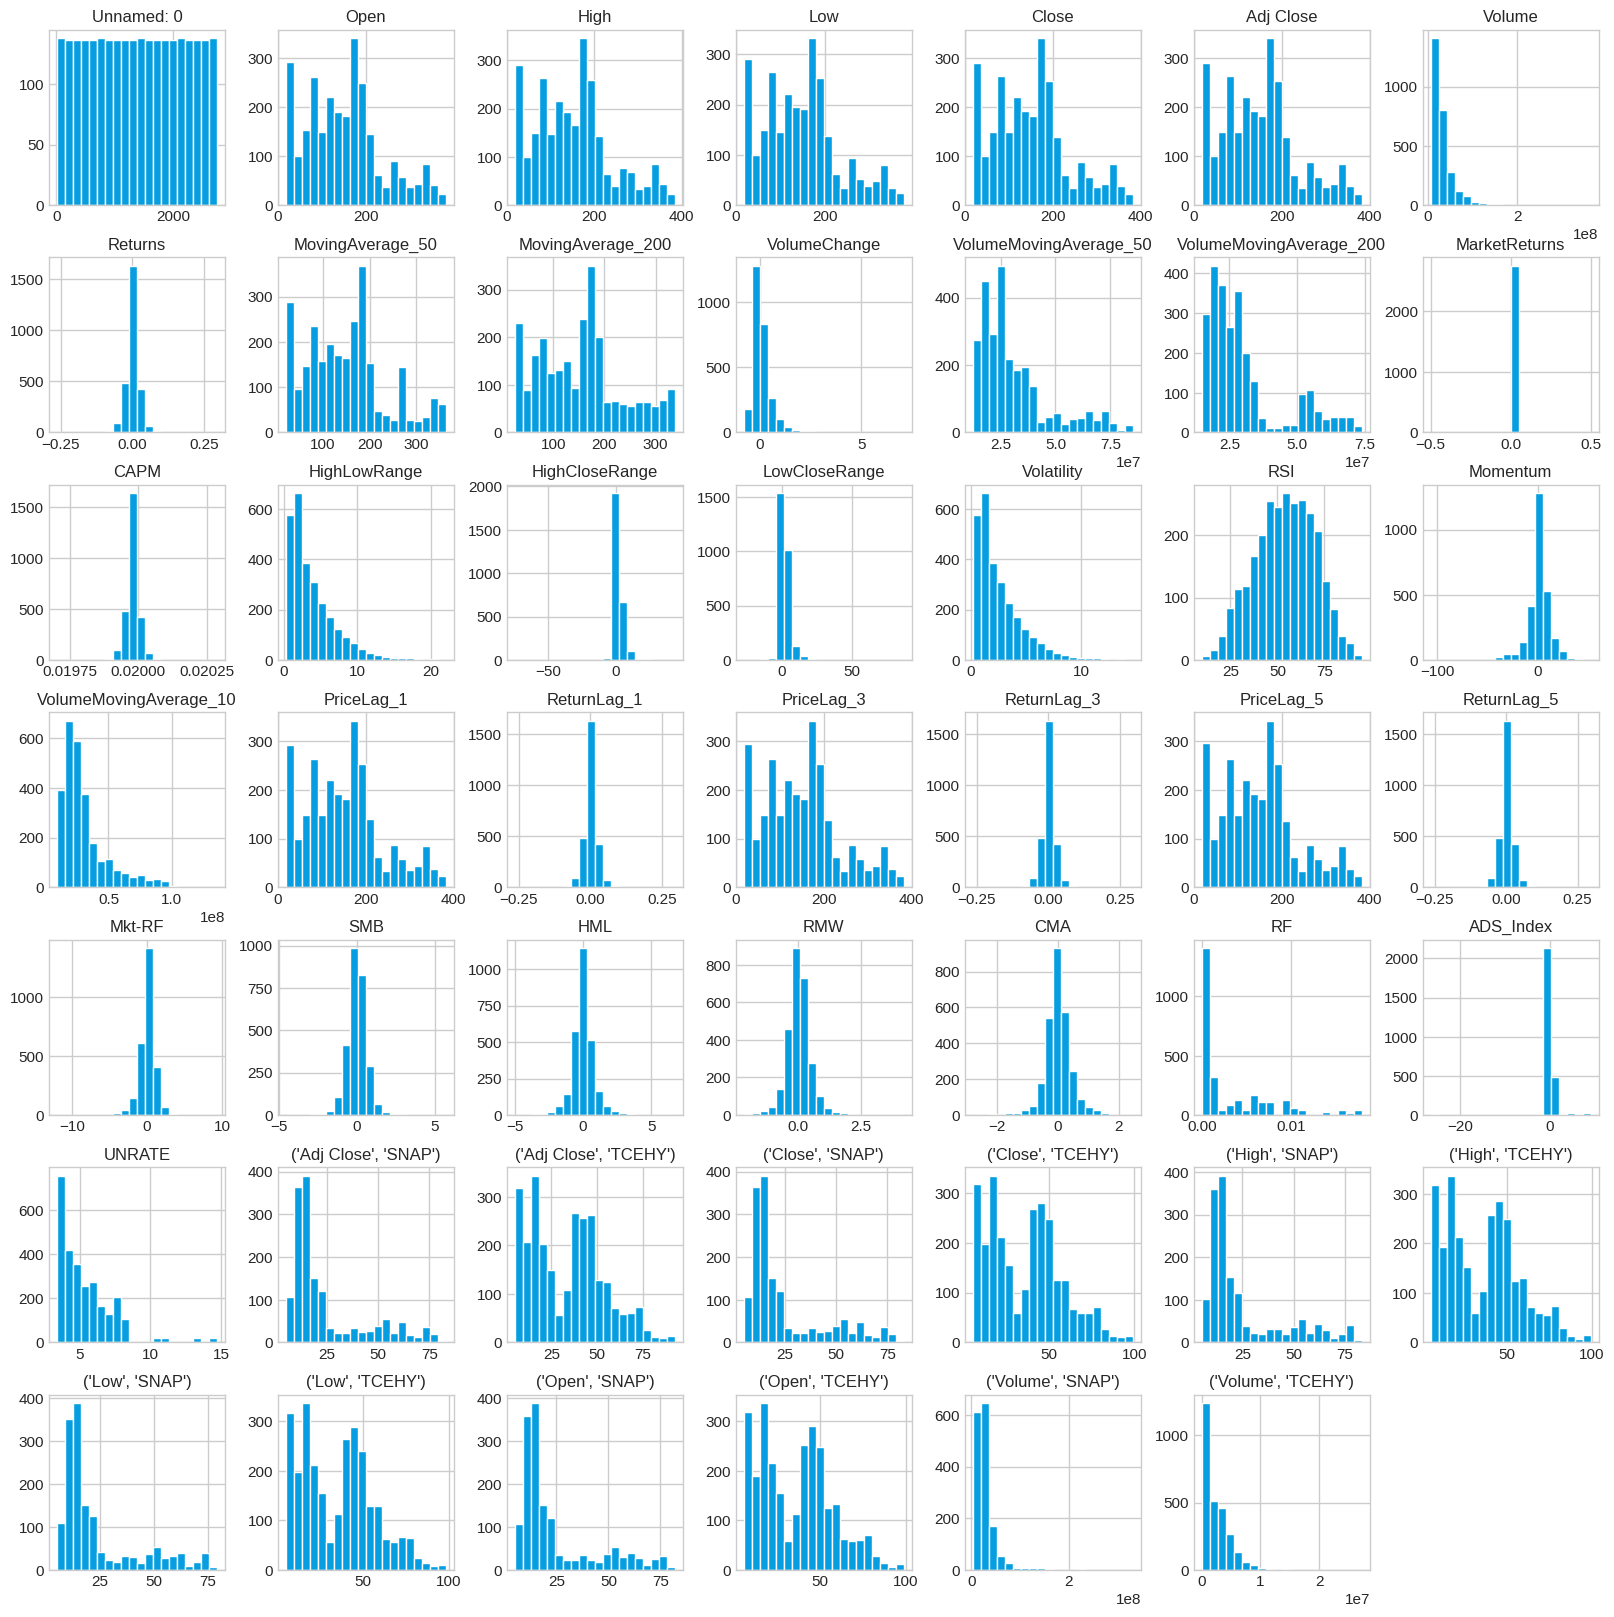

In [126]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(20,20), color='#069EE1')
plt.show();

In [127]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("Date", axis=1, inplace=True)
data.drop("Adj Close", axis=1, inplace=True)



In [128]:
data.head()

,Open,High,Low,Close,Volume,Returns,MovingAverage_50,MovingAverage_200,VolumeChange,VolumeMovingAverage_50,...,"('Close', 'SNAP')","('Close', 'TCEHY')","('High', 'SNAP')","('High', 'TCEHY')","('Low', 'SNAP')","('Low', 'TCEHY')","('Open', 'SNAP')","('Open', 'TCEHY')","('Volume', 'SNAP')","('Volume', 'TCEHY')"
9,28.889999,29.15,27.389999,27.719999,41855500,-0.063514,NaN,NaN,-0.625082,NaN,...,NaN,5.450,NaN,5.482,NaN,5.322,NaN,5.322,NaN,393000
10,27.200001,27.65,26.440001,26.900000,35230300,-0.029582,NaN,NaN,-0.158287,NaN,...,NaN,5.420,NaN,5.432,NaN,5.368,NaN,5.384,NaN,174000
11,26.700001,27.76,25.750000,25.870001,42473400,-0.038290,NaN,NaN,0.205593,NaN,...,NaN,5.398,NaN,5.442,NaN,5.386,NaN,5.394,NaN,205000
12,26.070000,27.17,25.520000,26.809999,61489200,0.036335,NaN,NaN,0.447711,NaN,...,NaN,5.660,NaN,5.660,NaN,5.550,NaN,5.550,NaN,171000
13,27.000000,27.35,26.150000,26.309999,26159500,-0.018650,NaN,NaN,-0.574568,NaN,...,NaN,5.726,NaN,5.814,NaN,5.630,NaN,5.630,NaN,936000


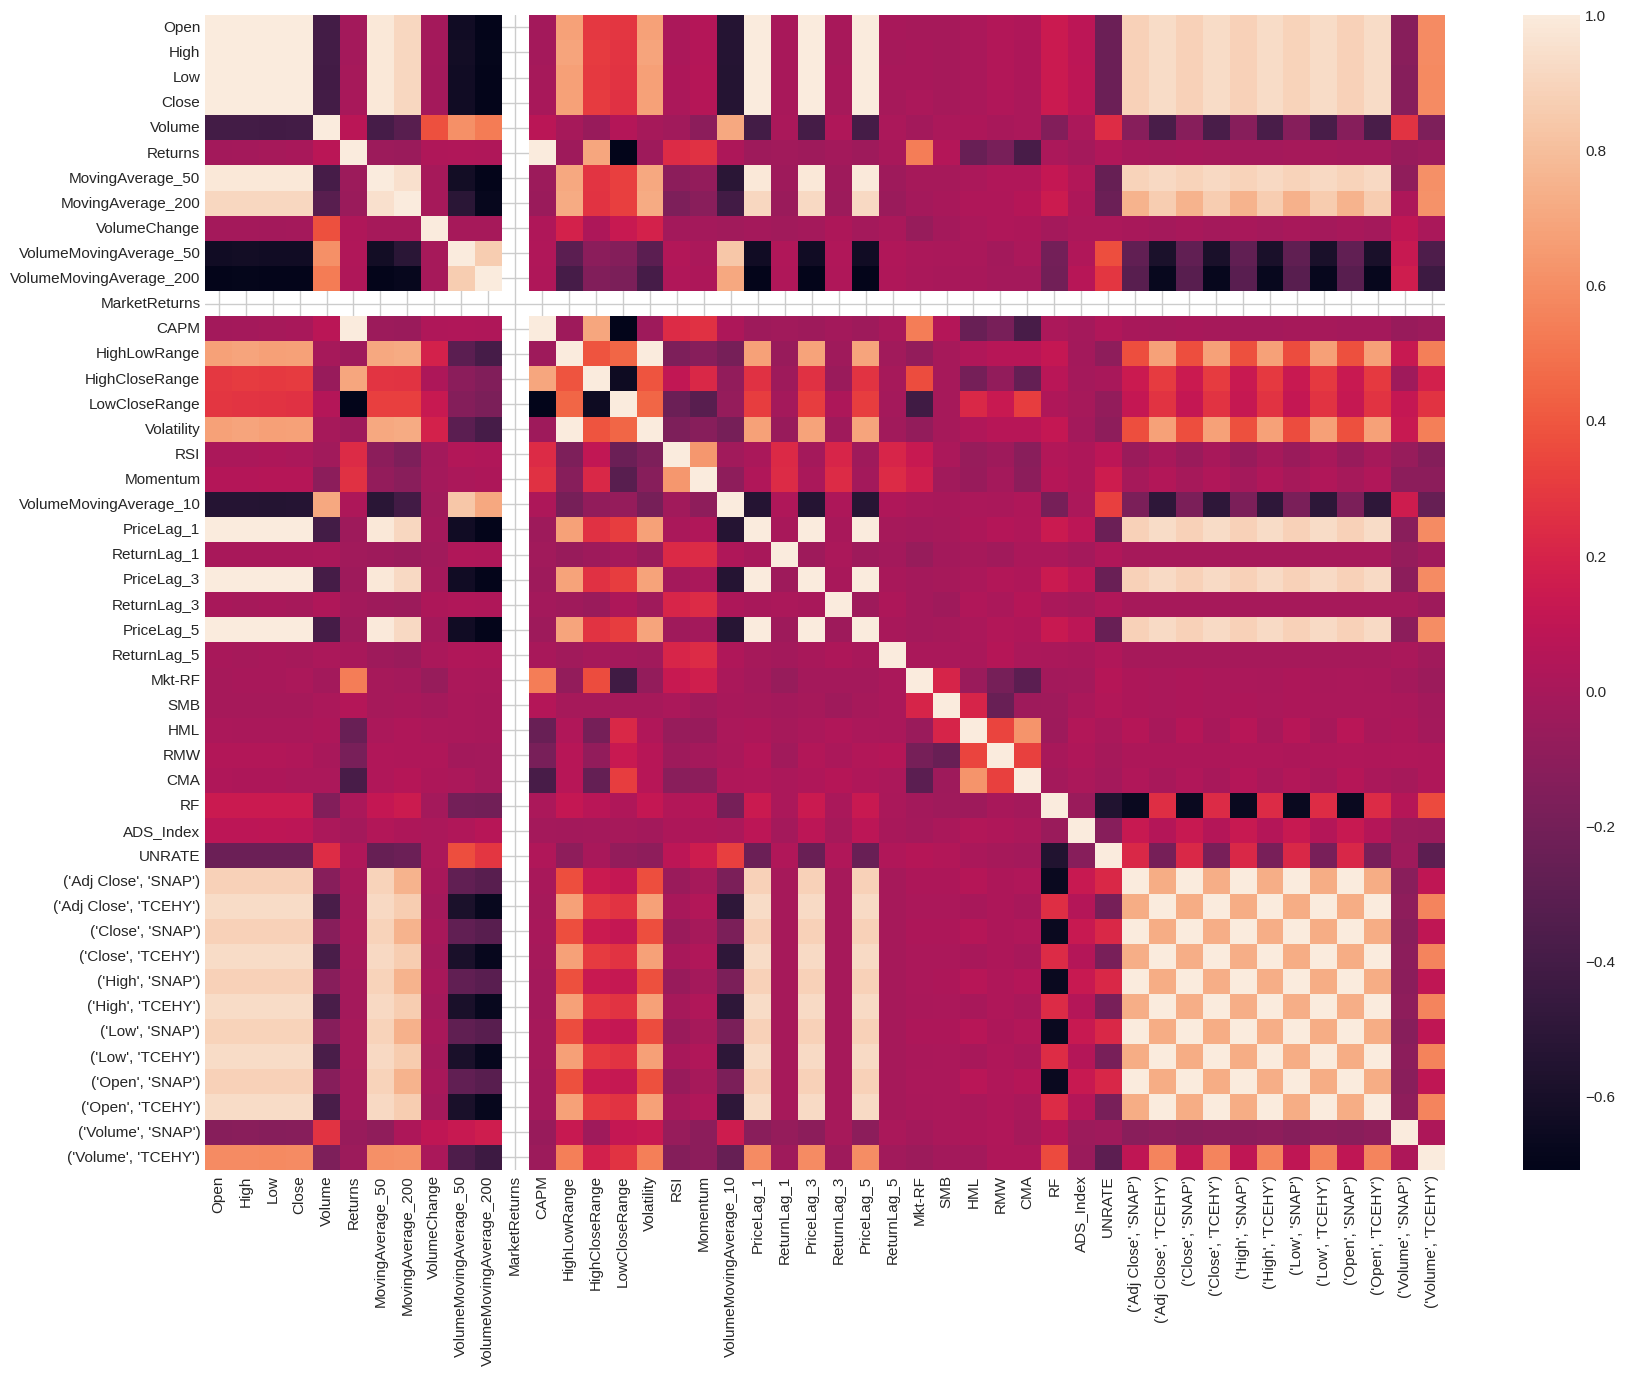

In [129]:

#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [130]:
data.corr().unstack().sort_values().drop_duplicates()

LowCloseRange            Returns              -0.709044
CAPM                     LowCloseRange        -0.709044
VolumeMovingAverage_200  MovingAverage_50     -0.699551
                         Low                  -0.697214
                         PriceLag_5           -0.696695
                                                 ...   
('Close', 'TCEHY')       ('High', 'TCEHY')     0.999859
('Volume', 'SNAP')       ('Volume', 'SNAP')    1.000000
HighLowRange             Volatility            1.000000
Returns                  CAPM                  1.000000
Open                     MarketReturns              NaN
Length: 945, dtype: float64

In [131]:
corr_values = data.corr()["Close"].sort_values(ascending=False)
filtered_corr = corr_values[(corr_values > 0.1) | (corr_values < -0.1)]
print(filtered_corr)


Close                      1.000000
Low                        0.999740
High                       0.999719
Open                       0.999433
PriceLag_1                 0.998782
PriceLag_3                 0.996527
PriceLag_5                 0.994606
MovingAverage_50           0.982616
('High', 'TCEHY')          0.928322
('Adj Close', 'TCEHY')     0.928271
('Close', 'TCEHY')         0.928221
('Low', 'TCEHY')           0.928210
('Open', 'TCEHY')          0.927966
MovingAverage_200          0.910172
('Low', 'SNAP')            0.886774
('Close', 'SNAP')          0.885724
('Adj Close', 'SNAP')      0.885724
('Open', 'SNAP')           0.884906
('High', 'SNAP')           0.883870
HighLowRange               0.676584
Volatility                 0.676584
('Volume', 'TCEHY')        0.586687
HighCloseRange             0.303749
LowCloseRange              0.264890
RF                         0.142183
('Volume', 'SNAP')        -0.124503
UNRATE                    -0.239003
Volume                    -0

{PriceLag_1                 0.998782,
PriceLag_3                 0.996527,
PriceLag_5                 0.994606}

{('High', 'TCEHY')          0.928322,
('Adj Close', 'TCEHY')     0.928271,
('Close', 'TCEHY')         0.928221,
('Low', 'TCEHY')           0.928210,
('Open', 'TCEHY')          0.927966}

{('Low', 'SNAP')            0.886774,
('Close', 'SNAP')          0.885724,
('Adj Close', 'SNAP')      0.885724,
('Open', 'SNAP')           0.884906,
('High', 'SNAP')           0.883870}

{VolumeMovingAverage_10    -0.540048,
VolumeMovingAverage_50    -0.629334,
VolumeMovingAverage_200   -0.696307
}

{MovingAverage_200          0.910172,
MovingAverage_50           0.982616
}


Are Highight correlated to each other, so we will be taking only PriceLag_1, ('High', 'TCEHY'), ('Low', 'SNAP'), VolumeMovingAverage_10 and MovingAverage_50 in to account.

In [132]:

def corrFilter(bound: float):
    xCorr = data.corr()#["y_yes"]
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.9)

MovingAverage_200  Low                   0.908300
Close              MovingAverage_200     0.910172
Open               MovingAverage_200     0.910567
PriceLag_1         MovingAverage_200     0.911764
MovingAverage_200  High                  0.912979
                                           ...   
('Open', 'TCEHY')  ('High', 'TCEHY')     0.999826
('High', 'TCEHY')  ('Close', 'TCEHY')    0.999859
HighLowRange       Volatility            1.000000
CAPM               Returns               1.000000
Open               Open                       NaN
Length: 95, dtype: float64

In [133]:
print(data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'MovingAverage_50',
       'MovingAverage_200', 'VolumeChange', 'VolumeMovingAverage_50',
       'VolumeMovingAverage_200', 'MarketReturns', 'CAPM', 'HighLowRange',
       'HighCloseRange', 'LowCloseRange', 'Volatility', 'RSI', 'Momentum',
       'VolumeMovingAverage_10', 'PriceLag_1', 'ReturnLag_1', 'PriceLag_3',
       'ReturnLag_3', 'PriceLag_5', 'ReturnLag_5', 'Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'RF', 'ADS_Index', 'UNRATE', '('Adj Close', 'SNAP')',
       '('Adj Close', 'TCEHY')', '('Close', 'SNAP')', '('Close', 'TCEHY')',
       '('High', 'SNAP')', '('High', 'TCEHY')', '('Low', 'SNAP')',
       '('Low', 'TCEHY')', '('Open', 'SNAP')', '('Open', 'TCEHY')',
       '('Volume', 'SNAP')', '('Volume', 'TCEHY')'],
      dtype='object')


In [134]:
columns_to_drop = ['High', 'Low',  'Returns',
                   'MovingAverage_200', 'VolumeChange', 'VolumeMovingAverage_50',
                   'MarketReturns', 'CAPM', 'RSI', 'Momentum',
                   'ReturnLag_1', 'PriceLag_3', 'ReturnLag_3', 'PriceLag_5',
                   'ReturnLag_5', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA',
                   'ADS_Index', "('Adj Close', 'SNAP')", "('Adj Close', 'TCEHY')",
                   "('Close', 'SNAP')", "('Close', 'TCEHY')", "('High', 'SNAP')",  "('Low', 'TCEHY')",
                   "('Open', 'SNAP')", "('Open', 'TCEHY')"]

new_data = data.drop(columns=columns_to_drop)


In [135]:
new_data.head()

,Open,Close,Volume,MovingAverage_50,VolumeMovingAverage_200,HighLowRange,HighCloseRange,LowCloseRange,Volatility,VolumeMovingAverage_10,PriceLag_1,RF,UNRATE,"('High', 'TCEHY')","('Low', 'SNAP')","('Volume', 'SNAP')","('Volume', 'TCEHY')"
9,28.889999,27.719999,41855500,NaN,NaN,1.760000,-0.450001,2.210001,1.173333,129336870.0,29.600000,0.0,8.2,5.482,NaN,NaN,393000
10,27.200001,26.900000,35230300,NaN,NaN,1.209999,-0.070000,1.279999,0.806666,75502260.0,27.719999,0.0,8.2,5.432,NaN,NaN,174000
11,26.700001,25.870001,42473400,NaN,NaN,2.010000,0.860001,1.150000,1.340000,62930330.0,26.900000,0.0,8.2,5.442,NaN,NaN,205000
12,26.070000,26.809999,61489200,NaN,NaN,1.650000,1.299999,0.350000,1.100000,58900590.0,25.870001,0.0,8.2,5.660,NaN,NaN,171000
13,27.000000,26.309999,26159500,NaN,NaN,1.200001,0.540001,0.660000,0.800001,54156540.0,26.809999,0.0,8.2,5.814,NaN,NaN,936000


In [136]:

#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
new_data.replace([np.inf, -np.inf], np.nan)

new_data.dropna(inplace=True)

In [137]:
# Separate inputs (features) and outputs (target)
outputs = new_data['Close']
inputs = new_data.drop(columns=['Close'])



In [138]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
selector = SelectKBest(f_regression, k=8)
selector.fit(inputs, outputs)
cols = selector.get_support(indices=True)
features_df_new = inputs.iloc[:,cols]

In [139]:

features_df_new.head()

,Open,MovingAverage_50,HighLowRange,Volatility,PriceLag_1,RF,"('High', 'TCEHY')","('Low', 'SNAP')"
1203,137.089996,128.233599,1.510010,1.006673,137.419998,0.001,26.650000,23.500000
1204,136.630005,128.592199,1.250000,0.833333,136.759995,0.001,26.920000,26.059999
1205,136.880005,128.958799,1.320007,0.880005,137.169998,0.001,27.090000,23.770000
1206,137.029999,129.323999,1.379990,0.919993,137.419998,0.001,27.360001,20.639999
1207,137.149994,129.730399,0.940002,0.626668,137.300003,0.001,27.400000,21.309999


In [151]:
from matplotlib.cm import datad
from typing_extensions import dataclass_transform
#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)
# Separate inputs (features) and outputs (target)
outputs = data['Close']
inputs = data.drop(columns=['Close'])
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
selector = SelectKBest(f_regression, k=10)
selector.fit(inputs, outputs)
cols = selector.get_support(indices=True)
features_df_new = inputs.iloc[:,cols]


In [152]:
features_df_new.head()

,Open,High,Low,MovingAverage_50,PriceLag_1,PriceLag_3,PriceLag_5,"('Adj Close', 'SNAP')","('Close', 'SNAP')","('Low', 'SNAP')"
1203,137.089996,137.820007,136.309998,128.233599,137.419998,136.410004,135.360001,24.480000,24.480000,23.500000
1204,136.630005,137.330002,136.080002,128.592199,136.759995,135.539993,135.440002,27.090000,27.090000,26.059999
1205,136.880005,137.830002,136.509995,128.958799,137.169998,137.419998,136.410004,23.770000,23.770000,23.770000
1206,137.029999,138.369995,136.990005,129.323999,137.419998,136.759995,135.539993,21.440001,21.440001,20.639999
1207,137.149994,137.990005,137.050003,129.730399,137.300003,137.169998,137.419998,22.809999,22.809999,21.309999


In [140]:
columns_to_drop = ['Volume','VolumeMovingAverage_200','HighCloseRange','LowCloseRange',	'UNRATE','VolumeMovingAverage_10',	"('Volume', 'SNAP')","('Volume', 'TCEHY')"]

new_data2 = new_data.drop(columns=columns_to_drop)


In [141]:
new_data2.head()

,Open,Close,MovingAverage_50,HighLowRange,Volatility,PriceLag_1,RF,"('High', 'TCEHY')","('Low', 'SNAP')"
1203,137.089996,136.759995,128.233599,1.510010,1.006673,137.419998,0.001,26.650000,23.500000
1204,136.630005,137.169998,128.592199,1.250000,0.833333,136.759995,0.001,26.920000,26.059999
1205,136.880005,137.419998,128.958799,1.320007,0.880005,137.169998,0.001,27.090000,23.770000
1206,137.029999,137.300003,129.323999,1.379990,0.919993,137.419998,0.001,27.360001,20.639999
1207,137.149994,137.720001,129.730399,0.940002,0.626668,137.300003,0.001,27.400000,21.309999


In [148]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Split the data into inputs (features) and target (output)
y = new_data2['Close']
X = new_data2.drop(columns=['Close'])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Sort the feature importance scores in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]

# Print the feature importance scores
for i, score in enumerate(sorted_scores):
    print(f"Feature: {X.columns[sorted_indices[i]]}, Importance Score: {score:.4f}")
# plot feature importanceimportances = list(zip(xgb_classifier.feature_importances_, df.columns))



Feature: Open, Importance Score: 2.1947
Feature: PriceLag_1, Importance Score: 0.0065
Feature: ('Low', 'SNAP'), Importance Score: 0.0000
Feature: RF, Importance Score: 0.0000
Feature: MovingAverage_50, Importance Score: 0.0000
Feature: HighLowRange, Importance Score: 0.0000
Feature: Volatility, Importance Score: 0.0000
Feature: ('High', 'TCEHY'), Importance Score: -0.0000


In [149]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)


# Split the data into inputs (features) and target (output)
y = data['Close']
X = data.drop(columns=['Close'])


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Sort the feature importance scores in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]

# Print the feature importance scores
for i, score in enumerate(sorted_scores):
    print(f"Feature: {X.columns[sorted_indices[i]]}, Importance Score: {score:.4f}")
# plot feature importanceimportances = list(zip(xgb_classifier.feature_importances_, df.columns))



Feature: High, Importance Score: 0.3838
Feature: Low, Importance Score: 0.3475
Feature: PriceLag_1, Importance Score: 0.3293
Feature: Open, Importance Score: 0.1562
Feature: ('Close', 'TCEHY'), Importance Score: 0.0947
Feature: ('High', 'SNAP'), Importance Score: 0.0815
Feature: ('High', 'TCEHY'), Importance Score: 0.0533
Feature: ('Low', 'TCEHY'), Importance Score: 0.0363
Feature: ('Low', 'SNAP'), Importance Score: 0.0274
Feature: ('Close', 'SNAP'), Importance Score: 0.0232
Feature: ('Adj Close', 'SNAP'), Importance Score: 0.0232
Feature: ('Open', 'SNAP'), Importance Score: 0.0195
Feature: ('Open', 'TCEHY'), Importance Score: 0.0148
Feature: Returns, Importance Score: 0.0019
Feature: PriceLag_5, Importance Score: 0.0006
Feature: ('Adj Close', 'TCEHY'), Importance Score: 0.0004
Feature: MovingAverage_50, Importance Score: 0.0001
Feature: PriceLag_3, Importance Score: 0.0001
Feature: MovingAverage_200, Importance Score: 0.0000
Feature: Momentum, Importance Score: 0.0000
Feature: Mkt-RF,